In [100]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier

In [101]:
df = pd.read_csv('clean_data.csv')
print(df.shape)
df.head()

(537, 24)


,Employee Name,ID,Gender,Age,Married,Role,Salary,Position,Absences,Projects_Completed,...,Moral,Stress & Burnout Score,Ongoing_Project_Count,Projects_Within_Deadline,Project_Start_Date,Project_Description,Project_Difficulty,Project_Deadline,Manager_ID,Completion_Time
0,Ram Prasad,1,Male,34,Married,Backend Developer,"2,60,000",Senior,2,42,...,Very High,3,3,22,5/2/2024,Design an efficient algorithm for data process...,High,15/3/2024,4,37
1,Neeraj Joshi,2,Male,58,Married,Backend Developer,"3,00,000",Senior,8,59,...,High,1,4,50,19/06/2022,Develop a secure user registration and login s...,High,10/07/2022,4,16
2,Shilpa Pathak,3,Female,41,Married,Backend Developer,"3,00,000",Senior,10,68,...,Very High,2,5,24,5/6/2023,Design and implement database structure for ma...,High,15/7/2023,4,38
3,Radhika Khanna,4,Female,34,Married,HR,"1,10,000",Senior,6,23,...,High,1,4,8,20/10/2023,Develop and implement employee wellness progra...,Medium,26/10/2023,2,4
4,Anjali Rana,5,Female,25,Married,HR,"1,20,000",Junior,1,22,...,High,5,1,8,16/7/2023,Working with Line Managers to implement and ev...,Medium,24/8/2023,2,36


In [102]:
df.isnull().values.any()

False

In [103]:
df.describe()

,ID,Age,Absences,Projects_Completed,Mean Monthly Hours,Years in the company,Joining_Year,Current_Employ_Rating,Stress & Burnout Score,Ongoing_Project_Count,Projects_Within_Deadline,Manager_ID,Completion_Time
count,537.000000,537.000000,537.000000,537.000000,537.000000,537.000000,537.000000,537.000000,537.000000,537.000000,537.000000,537.000000,537.000000
mean,256.513966,38.327747,5.150838,45.411546,198.271881,11.886406,2009.495345,7.355680,2.536313,2.975791,26.707635,2.901304,1294.556797
std,148.983772,10.749377,2.701845,20.703939,52.556052,6.341064,7.834367,1.606345,1.132576,1.504152,15.320037,1.181140,28683.108909
min,1.000000,22.000000,0.000000,6.000000,34.000000,0.000000,1969.000000,1.000000,1.000000,0.000000,0.000000,1.000000,-2.000000
25%,126.000000,31.000000,3.000000,26.000000,162.000000,7.000000,2005.000000,7.000000,2.000000,2.000000,15.000000,2.000000,10.000000
50%,254.000000,35.000000,5.000000,48.000000,196.000000,11.000000,2010.000000,7.000000,2.000000,3.000000,23.000000,3.000000,22.000000
75%,386.000000,44.000000,7.000000,59.000000,227.000000,16.000000,2015.000000,9.000000,3.000000,4.000000,40.000000,4.000000,45.000000
max,518.000000,65.000000,18.000000,150.000000,431.000000,40.000000,2024.000000,10.000000,5.000000,12.000000,72.000000,5.000000,664732.000000


In [104]:
## no duplicates
duplicate_rows = df[df.duplicated()]
print(duplicate_rows.shape[0])

0


In [105]:
# unique_values = df['Stress & Burnout Score'].unique()
# print(unique_values)

In [106]:
## Label Encoding

categorical_columns = ['Gender', 'Married', 'Role', 'Position', 'Moral', 'Project_Difficulty','Stress & Burnout Score']
for col in categorical_columns:
    df[col] = pd.factorize(df[col])[0]

df.head()

,Employee Name,ID,Gender,Age,Married,Role,Salary,Position,Absences,Projects_Completed,...,Moral,Stress & Burnout Score,Ongoing_Project_Count,Projects_Within_Deadline,Project_Start_Date,Project_Description,Project_Difficulty,Project_Deadline,Manager_ID,Completion_Time
0,Ram Prasad,1,0,34,0,0,"2,60,000",0,2,42,...,0,0,3,22,5/2/2024,Design an efficient algorithm for data process...,0,15/3/2024,4,37
1,Neeraj Joshi,2,0,58,0,0,"3,00,000",0,8,59,...,1,1,4,50,19/06/2022,Develop a secure user registration and login s...,0,10/07/2022,4,16
2,Shilpa Pathak,3,1,41,0,0,"3,00,000",0,10,68,...,0,2,5,24,5/6/2023,Design and implement database structure for ma...,0,15/7/2023,4,38
3,Radhika Khanna,4,1,34,0,1,"1,10,000",0,6,23,...,1,1,4,8,20/10/2023,Develop and implement employee wellness progra...,1,26/10/2023,2,4
4,Anjali Rana,5,1,25,0,1,"1,20,000",1,1,22,...,1,3,1,8,16/7/2023,Working with Line Managers to implement and ev...,1,24/8/2023,2,36


In [107]:
df.dtypes

Employee Name               object
ID                           int64
Gender                       int64
Age                          int64
Married                      int64
Role                         int64
Salary                      object
Position                     int64
Absences                     int64
Projects_Completed           int64
Mean Monthly Hours           int64
Years in the company         int64
Joining_Year                 int64
Current_Employ_Rating        int64
Moral                        int64
Stress & Burnout Score       int64
Ongoing_Project_Count        int64
Projects_Within_Deadline     int64
Project_Start_Date          object
Project_Description         object
Project_Difficulty           int64
Project_Deadline            object
Manager_ID                   int64
Completion_Time              int64
dtype: object

In [108]:
## remove employee name & joining year

cols = ['Employee Name', 'Joining_Year','ID','Project_Description']
df = df.drop(columns=cols)

In [109]:
df.head(3)

,Gender,Age,Married,Role,Salary,Position,Absences,Projects_Completed,Mean Monthly Hours,Years in the company,Current_Employ_Rating,Moral,Stress & Burnout Score,Ongoing_Project_Count,Projects_Within_Deadline,Project_Start_Date,Project_Difficulty,Project_Deadline,Manager_ID,Completion_Time
0,0,34,0,0,"2,60,000",0,2,42,143,5,9,0,0,3,22,5/2/2024,0,15/3/2024,4,37
1,0,58,0,0,"3,00,000",0,8,59,201,17,5,1,1,4,50,19/06/2022,0,10/07/2022,4,16
2,1,41,0,0,"3,00,000",0,10,68,198,16,7,0,2,5,24,5/6/2023,0,15/7/2023,4,38


In [110]:
# Time Allotted - Deadline - Start Date

try:
  df['Project_Start_Date'] = pd.to_datetime(df['Project_Start_Date'], format='%d/%m/%y')
  df['Project_Deadline'] = pd.to_datetime(df['Project_Deadline'], format='%d/%m/%y')
except:
  df['Project_Start_Date'] = pd.to_datetime(df['Project_Start_Date'], format='%d/%m/%Y',errors='coerce')
  df['Project_Deadline'] = pd.to_datetime(df['Project_Deadline'], format='%d/%m/%Y',errors='coerce')

df['Time_Allotted'] = (df['Project_Deadline'] - df['Project_Start_Date']).dt.days

In [111]:
cols = ['Project_Start_Date','Project_Deadline']
df = df.drop(columns=cols)

In [112]:
df['Salary'] = df['Salary'].str.replace(',', '').astype(int)

In [113]:
# df['Stress & Burnout Score'] = df['Stress & Burnout Score'].replace({1: 0, 2: 1, 3: 2, 4: 3, 5: 4})

In [114]:
numerical_features = ['Age', 'Salary','Mean Monthly Hours', 'Absences',
                       'Ongoing_Project_Count','Projects_Within_Deadline','Projects_Completed','Completion_Time']

categorical_features = ['Gender', 'Current_Employ_Rating','Married', 'Role','Position', 'Moral', 'Project_Difficulty','Manager_ID']

target_variable = ['Stress & Burnout Score']

In [115]:
## Normalising the numerical values

scaler = StandardScaler()
df[numerical_features] = scaler.fit_transform(df[numerical_features])

In [116]:
features = numerical_features + categorical_features

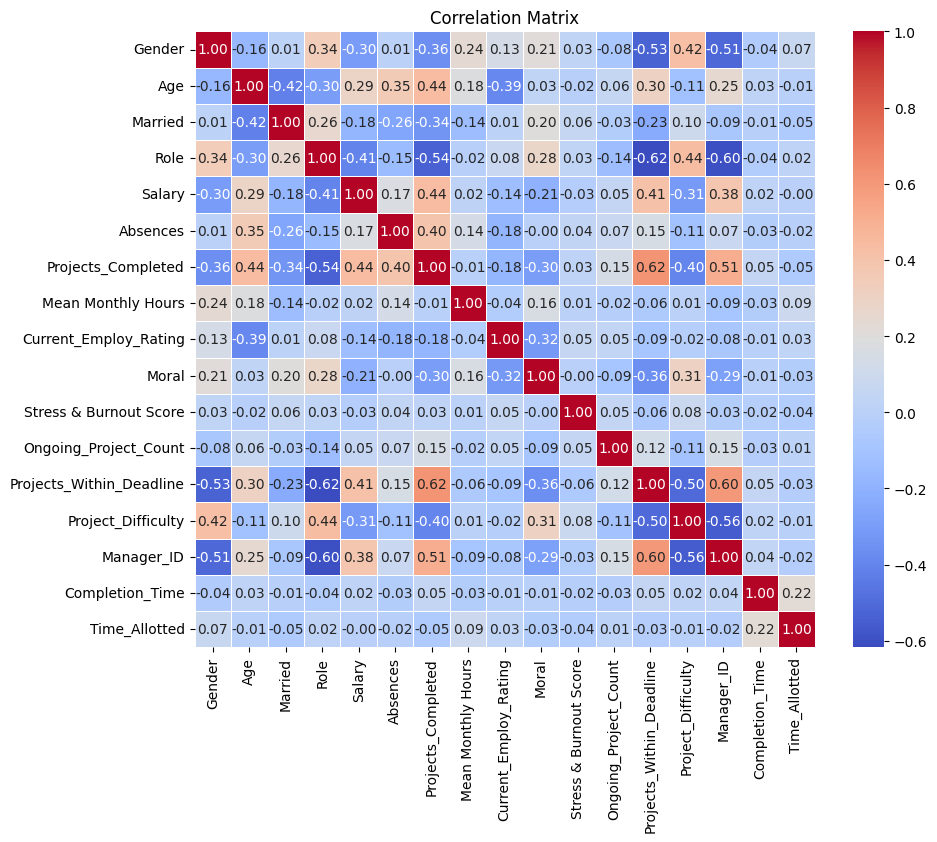

DataFrame after removing correlated features:
Index(['Gender', 'Age', 'Married', 'Role', 'Salary', 'Absences',
       'Projects_Completed', 'Mean Monthly Hours', 'Current_Employ_Rating',
       'Moral', 'Stress & Burnout Score', 'Ongoing_Project_Count',
       'Projects_Within_Deadline', 'Project_Difficulty', 'Manager_ID',
       'Completion_Time', 'Time_Allotted'],
      dtype='object')


In [136]:
## Removing the highly correlated features

correlation_matrix = df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix')
plt.show()

correlation_threshold = 0.8

highly_correlated_features = set()
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > correlation_threshold:
            colname = correlation_matrix.columns[i]
            highly_correlated_features.add(colname)

df = df.drop(highly_correlated_features, axis=1)

print("DataFrame after removing correlated features:")
print(df.columns)

In [137]:
## Train Test Split

X = df
y = df[target_variable]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (402, 17)
X_test shape: (135, 17)
y_train shape: (402, 1)
y_test shape: (135, 1)


In [138]:
## XGBoost Classifier

xgb_model = XGBClassifier(random_state=42)
xgb_model.fit(X_train, y_train)

y_pred_xgb = xgb_model.predict(X_test)

In [139]:
## predictions
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred_xgb)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 1.00
